## Data Cleaning and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from bs4 import BeautifulSoup
import ast
import requests
import json
import time
import warnings
warnings.filterwarnings('ignore')

### Ratings Data

In [2]:
df_ratings = pd.read_csv('../data/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
df_ratings.shape

(100836, 4)

In [4]:
df_ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [5]:
df_ratings.drop(columns=['timestamp'], inplace=True)

In [6]:
df_ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [7]:
df_ratings.nunique()

userId      610
movieId    9724
rating       10
dtype: int64

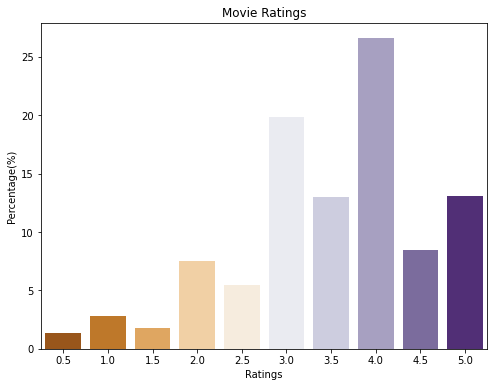

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x = df_ratings['rating'].value_counts(normalize=True).sort_index().index, y = df_ratings['rating'].value_counts(normalize=True).sort_index().values * 100, palette='PuOr')
plt.xlabel('Ratings')
plt.ylabel('Percentage(%)')
plt.title('Movie Ratings')
plt.savefig('../images/ratings.png', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight');

There are 9724 movies rated by 610 users. These ratings range from 0.5 to 5 in increments of 0.5. 4 is the most popular rating given by the users. 

### Movies Data

In [9]:
df_movies = pd.read_csv('../data/movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [10]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
df_movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [12]:
df_movies.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

There are 9742 unique movie IDs and 9737 unique movie titles. The dataset seems to have some movies that share title names. The movie titles also contain the year of release. The dataset also contains genres for each movie. 

In [13]:
#Extract the year out of the movie title
df_movies['year'] = df_movies['title'].map(lambda x: x[-5:-1] if x[-5:-1].isnumeric() else (x[-6:-2] if x[-6:-2].isnumeric() else'0'))
df_movies['year']

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: year, Length: 9742, dtype: object

In [14]:
df_movies[df_movies['year'] == '0']

,movieId,title,genres,year
6059,40697,Babylon 5,Sci-Fi,0
9031,140956,Ready Player One,Action|Sci-Fi|Thriller,0
9091,143410,Hyena Road,(no genres listed),0
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),0
9179,149334,Nocturnal Animals,Drama|Thriller,0
9259,156605,Paterson,(no genres listed),0
9367,162414,Moonlight,Drama,0
9448,167570,The OA,(no genres listed),0
9514,171495,Cosmos,(no genres listed),0
9515,171631,Maria Bamford: Old Baby,(no genres listed),0


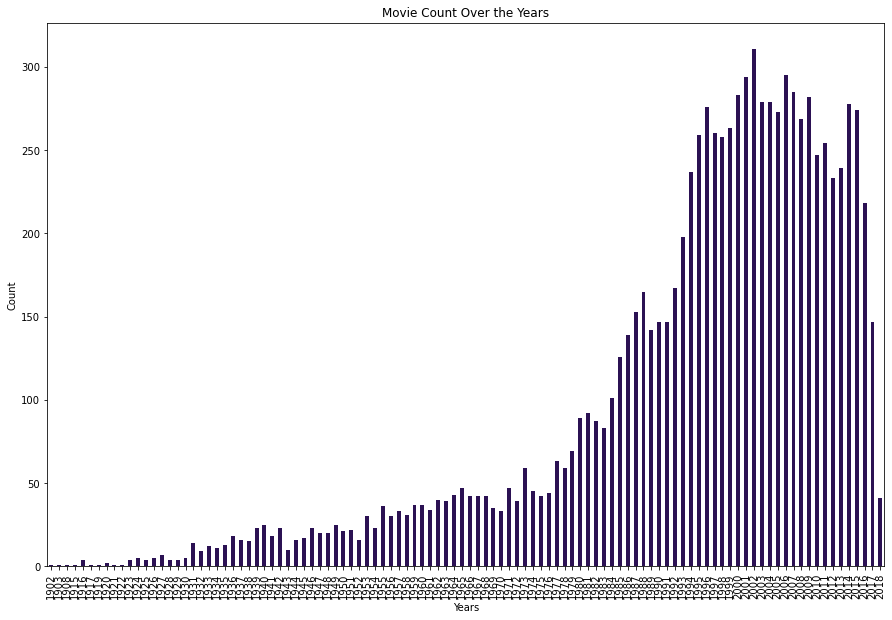

In [15]:
#Considered rows that do have year of release
plt.figure(figsize=(15,10))
df_movies[df_movies['year'] != '0']['year'].value_counts().sort_index(ascending=True).plot.bar(color='#2b1153')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Movie Count Over the Years');

In [16]:
#Combining data from movies dataset and ratings dataset. 
df = pd.merge(df_ratings, df_movies, left_on='movieId', right_on='movieId')
df.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995


In [17]:
df.nunique()

userId      610
movieId    9724
rating       10
title      9719
genres      951
year        107
dtype: int64

Number of rated movies per user

In [18]:
#Top 10 users with most number of ratings
df.groupby('userId')['rating'].count().sort_values(ascending=False).head(10)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
Name: rating, dtype: int64

In [19]:
#Bottom 10 users with least number of ratings
df.groupby('userId')['rating'].count().sort_values(ascending=False).tail(10)

userId
147    20
257    20
406    20
431    20
278    20
442    20
569    20
320    20
576    20
53     20
Name: rating, dtype: int64

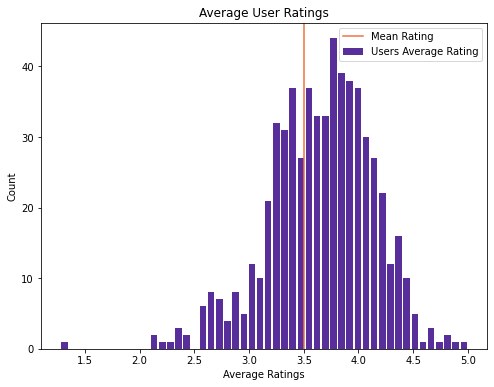

In [20]:
plt.figure(figsize=(8,6))
plt.hist(df.groupby('userId')['rating'].mean(), color='#582f9a', bins=50, rwidth=0.8, label='Users Average Rating')
plt.axvline(df['rating'].mean(), color = '#ee7043', label = 'Mean Rating')
plt.xlabel('Average Ratings')
plt.ylabel('Count')
plt.title('Average User Ratings')
plt.legend()
plt.savefig('../images/average_rating.png', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight');

The following plot shows number of ratings per movie. The x-axis comprises of movieIds ordered by the number of ratings recieved by each movie. As it is the ordered count of ratings per movie that matters and not the order of movie, th ex-axis has been left blank.   

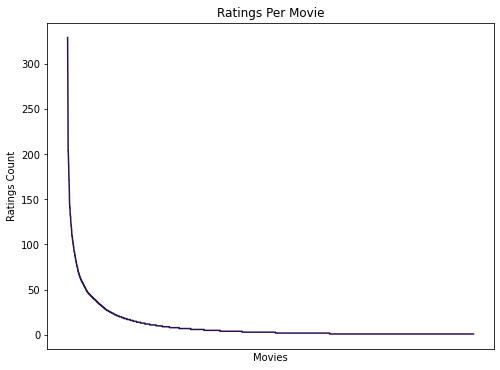

In [21]:
plt.figure(figsize=(8,6))
plt.plot(df.groupby('movieId')['rating'].count().sort_values(ascending=False).values, color ='#2b1153')
plt.xlabel('Movies')  #Movie Ids not arranged in a particular way
plt.ylabel('Ratings Count')
plt.title('Ratings Per Movie')
plt.xticks([])
plt.savefig('../images/ratings_per_movie.png', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight');

The plot above shows that there are less number of movies with more number of ratings and more number of movies with very few ratings. 

Extract the genres from each movie and create columns of genre. 

In [22]:
df['genres'].str.get_dummies().columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

There are movies with IMAX as a genre. IMAX is not really a genre, it is a movie viewing experience. As the goal of the project is to come up with recommendations on streaming services, IMAX doesn't particularly hold a value here. 

In [23]:
df[df['genres'].str.contains('IMAX')]['genres'].value_counts().sort_index()

Action|Adventure|Animation|Children|Comedy|IMAX           30
Action|Adventure|Animation|Children|Comedy|Sci-Fi|IMAX     1
Action|Adventure|Animation|Fantasy|IMAX                    8
Action|Adventure|Children|IMAX                            16
Action|Adventure|Comedy|Sci-Fi|IMAX                        1
                                                          ..
Horror|IMAX                                                6
Horror|Thriller|IMAX                                       1
Mystery|Sci-Fi|Thriller|IMAX                              21
Sci-Fi|IMAX                                               73
Sci-Fi|Thriller|IMAX                                      12
Name: genres, Length: 91, dtype: int64

Based on the observation above, none of the movies have just `IMAX` as a genre. SO if we were to remove IMAX from the genres column, we would not be loosing any information.  

In [24]:
df['genres'] = df['genres'].str.replace('IMAX','', regex=True)

In [25]:
#Saving dataframe to csv
df.to_csv('../data/ratings_title.csv', index=False)

In [26]:
df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
year       0
dtype: int64

In [27]:
df_movies[df_movies['genres'].str.contains('IMAX')]

,movieId,title,genres,year
123,150,Apollo 13 (1995),Adventure|Drama|IMAX,1995
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,1994
512,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,1991
1328,1797,Everest (1998),Documentary|IMAX,1998
2381,3159,Fantasia 2000 (1999),Animation|Children|Musical|IMAX,1999
...,...,...,...,...
8426,111364,Godzilla (2014),Action|Adventure|Sci-Fi|IMAX,2014
8433,111659,Maleficent (2014),Action|Adventure|Children|IMAX,2014
8438,111759,Edge of Tomorrow (2014),Action|Sci-Fi|IMAX,2014
8564,116529,Stalingrad (2013),Action|Drama|War|IMAX,2013


In [28]:
df_movies['genres'] = df_movies['genres'].str.replace('IMAX','', regex=True)

In [29]:
#One Hot Encoding genres column
df_genre = df['genres'].str.get_dummies()
df_genre

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100832,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
100833,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
100834,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [30]:
genres = df_genre.sum().sort_values(ascending=False)
genres

Drama                 41928
Comedy                39053
Action                30635
Thriller              26452
Adventure             24161
Romance               18124
Sci-Fi                17243
Crime                 16681
Fantasy               11834
Children               9208
Mystery                7674
Horror                 7291
Animation              6988
War                    4859
Musical                4138
Western                1930
Documentary            1219
Film-Noir               870
(no genres listed)       47
dtype: int64

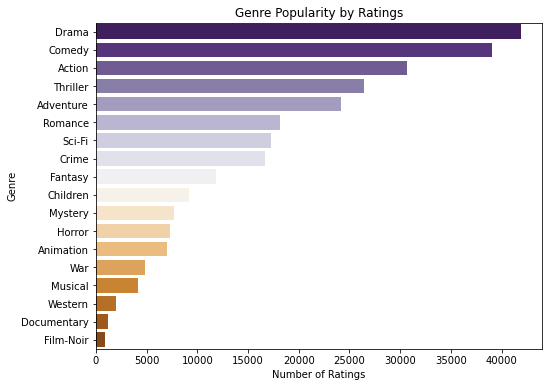

In [31]:
#Number of ratings per genre
plt.figure(figsize=(8,6))
sns.barplot(y = genres.index[:-1], x = genres.values[:-1], palette='PuOr_r')
plt.title('Genre Popularity by Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Genre')
plt.savefig('../images/genre_popularity', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight');

In [32]:
df_genre.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [33]:
#Scale the genre columns per the rating give by the users
for column in df_genre.columns:
    df_genre[column] *= df['rating']

In [34]:
df_genre

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.5,4.5,4.5,4.5,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.5,2.5,2.5,2.5,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.5,4.5,4.5,4.5,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0
100832,0.0,4.5,0.0,0.0,0.0,0.0,4.5,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100833,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
100834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,3.5,0.0,0.0


In [35]:
ones = []
twos = []
threes = []
fours = []
fives = []
for column in df_genre.drop(columns=['(no genres listed)']).columns:
    ratings = df_genre[df_genre[column]!=0][column].value_counts(normalize=True).sort_index().values[1::2]
    ones.append(ratings[0]*100)
    twos.append(ratings[1]*100)
    threes.append(ratings[2]*100)
    fours.append(ratings[3]*100)
    fives.append(ratings[4]*100)

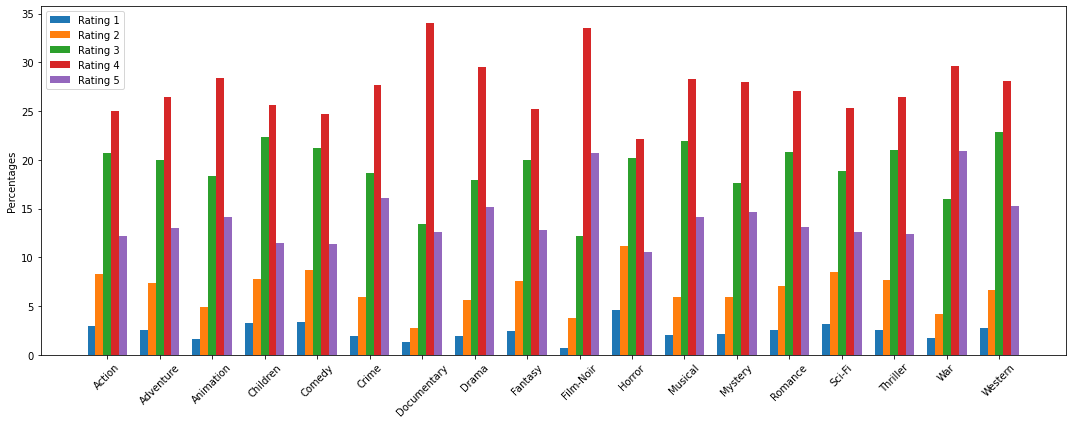

<Figure size 432x288 with 0 Axes>

In [37]:
labels = df_genre.drop(columns=['(no genres listed)']).columns.tolist()

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(15,6))
rects1 = ax.bar(x - width*2, ones, width, label='Rating 1')
rects2 = ax.bar(x - width, twos, width, label='Rating 2')
rects3 = ax.bar(x, threes, width, label='Rating 3')
rects4 = ax.bar(x + width, fours, width, label='Rating 4')
rects5 = ax.bar(x + width*2, fives, width, label='Rating 5')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentages')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=45)
ax.legend()

fig.tight_layout()

plt.show()
plt.savefig('../images/ratings_per_genre.png');

### TMDB Movies Data

In [40]:
df_meta = pd.read_csv('../data/movies_metadata.csv')
df_meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [41]:
df_meta.shape

(45466, 24)

In [42]:
df_meta.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [43]:
#Keep necessary columns
df_meta = df_meta[['id','imdb_id', 'overview','tagline', 'vote_average', 'vote_count']]

In [44]:
df_meta.isnull().sum()

id                  0
imdb_id            17
overview          954
tagline         25054
vote_average        6
vote_count          6
dtype: int64

In [45]:
df_meta['tagline'].fillna('', inplace=True)
df_meta['overview'].fillna('', inplace=True)

In [46]:
#The link between movielens data and TMDB data
df_links = pd.read_csv('../data/links.csv')
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [47]:
df_links.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [48]:
df_links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [49]:
df_links.dropna(inplace=True)

In [50]:
df_links['tmdbId'] = df_links['tmdbId'].map(lambda x: str(int(x)))

In [51]:
df_meta = pd.merge(df_meta, df_links, left_on = 'id', right_on = 'tmdbId')

In [52]:
df_meta.head()

,id,imdb_id,overview,tagline,vote_average,vote_count,movieId,imdbId,tmdbId
0,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",,7.7,5415.0,1,114709,862
1,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,6.9,2413.0,2,113497,8844
2,15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,3,113228,15602
3,31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,6.1,34.0,4,114885,31357
4,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.7,173.0,5,113041,11862


In [53]:
df_meta.drop(columns=['imdbId','id'], inplace=True)

In [54]:
#Rearranging the columns
df_meta = df_meta[['movieId','tmdbId','imdb_id', 'overview', 'tagline', 'vote_average',
       'vote_count']]

In [55]:
df_meta['movieId'] = df_meta['movieId'].map(str)

In [56]:
df_meta.shape

(9555, 7)

In [57]:
df_meta.nunique()

movieId         9544
tmdbId          9543
imdb_id         9541
overview        9514
tagline         7217
vote_average      78
vote_count      1794
dtype: int64

In [58]:
df_meta.drop_duplicates(inplace=True)

In [59]:
df_meta.reset_index(inplace=True)

In [60]:
df_meta.drop(columns=['index'], inplace=True)

In [61]:
df_movies['movieId'] = df_movies['movieId'].map(str)

In [62]:
df_meta = pd.merge(df_movies, df_meta, left_on = 'movieId', right_on='movieId')

In [63]:
df_meta.nunique()

movieId         9544
title           9541
genres           941
year             106
tmdbId          9543
imdb_id         9541
overview        9514
tagline         7217
vote_average      78
vote_count      1794
dtype: int64

In [64]:
df_meta.shape

(9546, 10)

Looks like there are some duplicates in the dataframe. 

In [65]:
df_meta[df_meta['title'].duplicated()]

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count
3149,4241,Pokémon 3: The Movie (2001),Animation|Children,2001,10991,tt0235679,When Molly Hale's sadness of her father's disa...,Pokémon: Spell of the Unknown,6.0,144.0
3761,5264,Clockstoppers (2002),Action|Adventure|Sci-Fi|Thriller,2002,15028,tt0157472,"Until now, Zak Gibbs' greatest challenge has b...","The adventure of a lifetime, in a few mere sec...",4.9,90.0
5590,26958,Emma (1996),Romance,1996,12254,tt0118308,Emma Woodhouse has a rigid sense of propriety ...,,6.7,34.0
6912,64997,War of the Worlds (2005),Action|Sci-Fi,2005,34812,tt0449040,In this modern retelling of H.G. Wells' classi...,,4.4,10.0
9069,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller,2002,4912,tt0270288,"Television made him famous, but his biggest hi...",Some things are better left top secret.,6.6,281.0


In [66]:
df_meta[df_meta['title'] == 'Pokémon 3: The Movie (2001)']

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count
3148,4241,Pokémon 3: The Movie (2001),Animation|Children,2001,10991,tt0235679,When Molly Hale's sadness of her father's disa...,Pokémon: Spell of the Unknown,6.0,143.0
3149,4241,Pokémon 3: The Movie (2001),Animation|Children,2001,10991,tt0235679,When Molly Hale's sadness of her father's disa...,Pokémon: Spell of the Unknown,6.0,144.0


In [67]:
df_meta[df_meta['title'] == 'Clockstoppers (2002)']

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count
3760,5264,Clockstoppers (2002),Action|Adventure|Sci-Fi|Thriller,2002,15028,tt0157472,"Until now, Zak Gibbs' greatest challenge has b...","The adventure of a lifetime, in a few mere sec...",4.9,89.0
3761,5264,Clockstoppers (2002),Action|Adventure|Sci-Fi|Thriller,2002,15028,tt0157472,"Until now, Zak Gibbs' greatest challenge has b...","The adventure of a lifetime, in a few mere sec...",4.9,90.0


In [68]:
df_meta[df_meta['title'] == 'Confessions of a Dangerous Mind (2002)']

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count
4162,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller,2002,4912,tt0270288,"Television made him famous, but his biggest hi...",Some things are better left top secret.,6.6,281.0
9069,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller,2002,4912,tt0270288,"Television made him famous, but his biggest hi...",Some things are better left top secret.,6.6,281.0


In [69]:
df_meta[df_meta['title'] == 'Emma (1996)']

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count
648,838,Emma (1996),Comedy|Drama|Romance,1996,3573,tt0116191,Emma Woodhouse is a congenial young lady who d...,Cupid is armed and dangerous!,6.7,152.0
5590,26958,Emma (1996),Romance,1996,12254,tt0118308,Emma Woodhouse has a rigid sense of propriety ...,,6.7,34.0


In [70]:
df_meta[df_meta['title'] == 'War of the Worlds (2005)']

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count
5916,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller,2005,74,tt0407304,Ray Ferrier is a divorced dockworker and less-...,They're already here.,6.2,2397.0
6912,64997,War of the Worlds (2005),Action|Sci-Fi,2005,34812,tt0449040,In this modern retelling of H.G. Wells' classi...,,4.4,10.0


The movies investigated above have same titles but are different. Since we intend to build a relevance matrix based on the movie title, we must no thave duplicates in the title. We would be relying on subject matter expertise on choosing amongs the duplicates. 
- The rows for movie `Pokémon 3: The Movie (2001)` are the same except the vote_count. One of the two rows can be deleted. There is a similar case with rows for movie `Clockstoppers (2002)`. 
- There are two seperate movieIds for the movie `Confessions of a Dangerous Mind (2002)` but all the other entries for the two rows are same. These can be considered duplicates. 
- Dealing with the two rows for `Emma (1996)` is a tricky situation. Upon checking the movies using their IMDb ids, one will see that the first row is a movie while the second is a TV movie. In order to stay consistent in the dataset, the first row, which is a movie, will be retained. 
- Upon checking the information for the two `War of the Worlds (2005)` movies, it has been found that the first entry is a movie whereas the second is a video game. Hence, the second entry will be deleted. 

In [71]:
df_meta.drop(index=[3148,3760,9069,5590,6912], inplace=True)

In [72]:
df_meta.reset_index(inplace=True)

In [73]:
df_meta.drop(columns=['index'], inplace=True)

### IMDb Rating Data

In [74]:
df_imdb = pd.read_csv('../data/ratings.tsv', sep='\t')
df_imdb.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1869
1,tt0000002,5.9,247
2,tt0000003,6.5,1644
3,tt0000004,5.8,159
4,tt0000005,6.2,2468


In [75]:
df_meta = pd.merge(df_meta, df_imdb, how='left', left_on='imdb_id', right_on='tconst')
df_meta.head()

,movieId,title,genres,year,tmdbId,imdb_id,overview,tagline,vote_average,vote_count,tconst,averageRating,numVotes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",,7.7,5415.0,tt0114709,8.3,956821.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,6.9,2413.0,tt0113497,7.0,334566.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,tt0113228,6.6,26930.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,6.1,34.0,tt0114885,5.9,10784.0
4,5,Father of the Bride Part II (1995),Comedy,1995,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.7,173.0,tt0113041,6.0,37433.0


In [76]:
df_meta.drop(columns=['tconst'], inplace=True)

In [77]:
df_meta.rename(columns={'movieId':'movie_id','tmdbId': 'tmdb_id','vote_average': 'tmdb_rating',
                        'vote_count': 'tmdb_votes', 'averageRating': 'imdb_rating', 'numVotes': 'imdb_votes'}, inplace=True)

In [78]:
df_meta.head()

,movie_id,title,genres,year,tmdb_id,imdb_id,overview,tagline,tmdb_rating,tmdb_votes,imdb_rating,imdb_votes
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",,7.7,5415.0,8.3,956821.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,6.9,2413.0,7.0,334566.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,6.6,26930.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,6.1,34.0,5.9,10784.0
4,5,Father of the Bride Part II (1995),Comedy,1995,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.7,173.0,6.0,37433.0


In [79]:
df_meta.isnull().sum()

movie_id       0
title          0
genres         0
year           0
tmdb_id        0
imdb_id        2
overview       0
tagline        0
tmdb_rating    0
tmdb_votes     0
imdb_rating    6
imdb_votes     6
dtype: int64

In [80]:
indices = df_meta[df_meta['imdb_id'].isnull()].index

In [81]:
type(indices[0])

numpy.int64

A quick research of the IMDB website gives the IMDB ids for the two movies above. 

In [82]:
df_meta.loc[indices[0],'imdb_id'] = 'tt0490048'

In [83]:
df_meta.loc[indices[1],'imdb_id'] = 'tt1325753'

In [84]:
df_meta.isnull().sum()

movie_id       0
title          0
genres         0
year           0
tmdb_id        0
imdb_id        0
overview       0
tagline        0
tmdb_rating    0
tmdb_votes     0
imdb_rating    6
imdb_votes     6
dtype: int64

In [85]:
#IMDB ids with missing rating data
imdb_ids = df_meta[df_meta['imdb_rating'].isnull()]['imdb_id'].values

In [86]:
imdb_ids

array(['tt0169590', 'tt0490048', 'tt1325753', 'tt3534602', 'tt0088263',
       'tt0862766'], dtype=object)

In [87]:
imdb_list = []
for imdb_id in imdb_ids: 
    #t= random.uniform(1, 7)
    time.sleep(3)
    url = 'https://www.imdb.com/title/' + imdb_id + '/?ref_=fn_al_tt_1'
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'lxml')
    script = soup.find('script', { 'id' : '__NEXT_DATA__' })
    imdb_dict = {}
    try:  
        #IMDB id
        imdb_dict['tconst'] = imdb_id
        #Rating
        imdb_dict['averageRating'] = json.loads(script.contents[0])['props']['pageProps']['aboveTheFoldData']['ratingsSummary']['aggregateRating']
        #Rating Vote Count
        imdb_dict['numVotes'] = json.loads(script.contents[0])['props']['pageProps']['aboveTheFoldData']['ratingsSummary']['voteCount']
        imdb_list.append(imdb_dict)
    except:
        imdb_dict['tconst'] = imdb_id
        #Rating
        imdb_dict['averageRating'] = 0
        #Rating Vote Count
        imdb_dict['numVotes'] = 0
        imdb_list.append(imdb_dict)

In [88]:
imdb_list

[{'tconst': 'tt0169590', 'averageRating': 0, 'numVotes': 0},
 {'tconst': 'tt0490048', 'averageRating': 8.2, 'numVotes': 2062},
 {'tconst': 'tt1325753', 'averageRating': 6.9, 'numVotes': 12397},
 {'tconst': 'tt3534602', 'averageRating': 5.1, 'numVotes': 10979},
 {'tconst': 'tt0088263', 'averageRating': 8.7, 'numVotes': 16873},
 {'tconst': 'tt0862766', 'averageRating': 8.5, 'numVotes': 13105}]

In [89]:
indices = df_meta[df_meta['imdb_rating'].isnull()][['imdb_id', 'imdb_rating','imdb_votes']].index

In [90]:
df_meta.iloc[indices][['imdb_id', 'imdb_rating','imdb_votes']]

,imdb_id,imdb_rating,imdb_votes
5606,tt0169590,NaN,NaN
7852,tt0490048,NaN,NaN
8114,tt1325753,NaN,NaN
8704,tt3534602,NaN,NaN
9182,tt0088263,NaN,NaN
9519,tt0862766,NaN,NaN


In [91]:
for i in range(len(indices)):
    df_meta.loc[indices[i], 'imdb_rating'] = imdb_list[i]['averageRating'] 
    df_meta.loc[indices[i], 'imdb_votes'] = imdb_list[i]['numVotes'] 

In [92]:
df_meta.iloc[indices][['imdb_id', 'imdb_rating','imdb_votes']]

,imdb_id,imdb_rating,imdb_votes
5606,tt0169590,0.0,0.0
7852,tt0490048,8.2,2062.0
8114,tt1325753,6.9,12397.0
8704,tt3534602,5.1,10979.0
9182,tt0088263,8.7,16873.0
9519,tt0862766,8.5,13105.0


In [93]:
df_meta.isnull().sum()

movie_id       0
title          0
genres         0
year           0
tmdb_id        0
imdb_id        0
overview       0
tagline        0
tmdb_rating    0
tmdb_votes     0
imdb_rating    0
imdb_votes     0
dtype: int64

<Figure size 576x432 with 0 Axes>

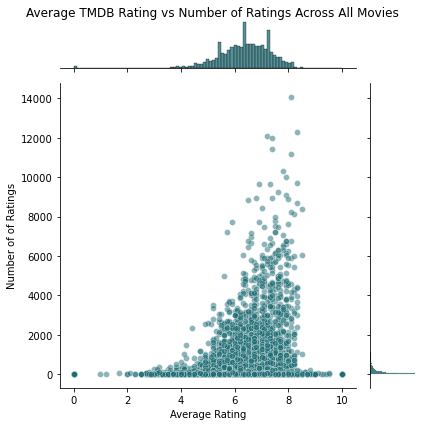

In [95]:
plt.figure(figsize=(8,6))
p = sns.jointplot(df_meta['tmdb_rating'], df_meta['tmdb_votes'], color='#1c6c74',alpha = 0.5)
p.fig.suptitle('Average TMDB Rating vs Number of Ratings Across All Movies')
p.set_axis_labels(xlabel='Average Rating', ylabel='Number of of Ratings')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)
plt.savefig('../images/tmdb_ratings.png', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight');

<Figure size 576x432 with 0 Axes>

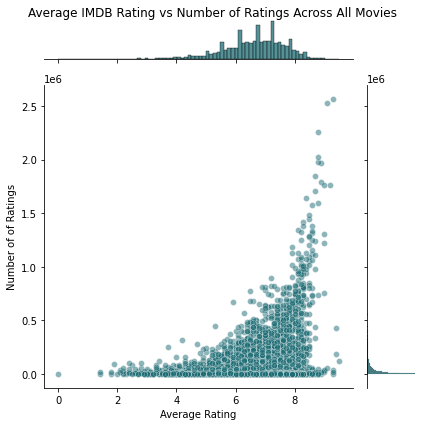

In [96]:
plt.figure(figsize=(8,6))
p = sns.jointplot(df_meta['imdb_rating'], df_meta['imdb_votes'], color='#1c6c74',alpha = 0.5)
p.fig.suptitle('Average IMDB Rating vs Number of Ratings Across All Movies')
p.set_axis_labels(xlabel='Average Rating', ylabel='Number of of Ratings')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)
plt.savefig('../images/imdb_ratings.png', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight');

### Keywords Data

In [97]:
df_keywords = pd.read_csv('../data/keywords.csv')
df_keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [98]:
df_keywords.dtypes

id           int64
keywords    object
dtype: object

In [99]:
df_meta['tmdb_id'] = df_meta['tmdb_id'].map(str)

In [100]:
df_keywords['id'] = df_keywords['id'].map(str)

In [101]:
df_keywords.nunique()

id          45432
keywords    25989
dtype: int64

In [102]:
df_keywords.shape

(46419, 2)

There seem to be some duplicate rows in the dataset. 

In [103]:
df_keywords[df_keywords['id'].duplicated()]

,id,keywords
1465,105045,"[{'id': 7059, 'name': 'anti-communism'}, {'id'..."
9165,5511,"[{'id': 90, 'name': 'paris'}, {'id': 1010, 'na..."
9327,23305,[]
12066,14788,"[{'id': 9826, 'name': 'murder'}, {'id': 10183,..."
13375,141971,[]
...,...,...
40994,298721,"[{'id': 1227, 'name': 'cemetery'}, {'id': 1261..."
41230,97995,[]
45774,10991,"[{'id': 1262, 'name': 'mountain'}, {'id': 2802..."
45779,12600,"[{'id': 9663, 'name': 'sequel'}, {'id': 11451,..."


In [104]:
df_keywords[df_keywords['id'] == '141971']

,id,keywords
13261,141971,[]
13375,141971,[]
16764,141971,[]


In [105]:
df_keywords[df_keywords['id'] == '39436']

,id,keywords
35717,39436,"[{'id': 11039, 'name': 'giallo'}, {'id': 15167..."
36674,39436,"[{'id': 11039, 'name': 'giallo'}, {'id': 15167..."


In [106]:
df_keywords.drop_duplicates(inplace=True)

In [107]:
#Merging the main data with the keywords data on tmdbId column 
df_meta = pd.merge(df_meta, df_keywords, left_on = 'tmdb_id', right_on = 'id')

In [108]:
df_meta.drop(columns = ['id'], inplace=True)

In [109]:
df_meta.shape

(9541, 13)

In [110]:
df_meta

,movie_id,title,genres,year,tmdb_id,imdb_id,overview,tagline,tmdb_rating,tmdb_votes,imdb_rating,imdb_votes,keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",,7.7,5415.0,8.3,956821.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,6.9,2413.0,7.0,334566.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,6.6,26930.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,6.1,34.0,5.9,10784.0,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,5,Father of the Bride Part II (1995),Comedy,1995,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.7,173.0,6.0,37433.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9536,175705,Themroc (1973),Comedy|Horror,1973,7014,tt0069369,"Made without proper language, just gibberish a...",,7.1,9.0,7.0,1521.0,"[{'id': 214655, 'name': 'absurdism'}]"
9537,175707,A German Life (2016),Documentary,2016,411516,tt5135434,"Brunhilde Pomsel describes herself as an ""apol...",,7.5,2.0,7.2,410.0,[]
9538,175743,Self-criticism of a Bourgeois Dog (2017),Comedy,2017,433410,tt6354108,A bourgeois dog confesses how he was transform...,,0.0,0.0,6.6,466.0,[]
9539,175781,Der Herr Karl (1961),Comedy,1961,28469,tt0273646,No overview found.,,10.0,1.0,8.8,231.0,[]


The `keywords` column consists of string of list of dictionaries. `ast.literal_eval()` is used to safely evaluate an expression or a string containing Python literal (raw data). This step skips the need to parse data. 

In [111]:
df_meta['keywords'] = df_meta['keywords'].map(ast.literal_eval)
df_meta['keywords'].head()

0    [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1    [{'id': 10090, 'name': 'board game'}, {'id': 1...
2    [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3    [{'id': 818, 'name': 'based on novel'}, {'id':...
4    [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...
Name: keywords, dtype: object

The following code separates all the keywords from list of dictionaries and puts them together. 

In [112]:
df_meta['keywords'] = df_meta['keywords'].map(lambda x : ' '.join([i['name'] for i in x]) if len(x)>0 else '')
df_meta['keywords']

0       jealousy toy boy friendship friends rivalry bo...
1       board game disappearance based on children's b...
2        fishing best friend duringcreditsstinger old men
3       based on novel interracial relationship single...
4       baby midlife crisis confidence aging daughter ...
                              ...                        
9536                                            absurdism
9537                                                     
9538                                                     
9539                                                     
9540                                       superhero lego
Name: keywords, Length: 9541, dtype: object

In [113]:
#Check for nulls
df_meta['keywords'].isnull().sum()

0

### Cast And Crew Data

In [115]:
df_cast = pd.read_csv('../data/credits.csv')
df_cast.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [116]:
df_cast['id'] = df_cast['id'].map(str)

In [117]:
#Filter out that dataframe with requiered movieIds
df_cast = df_cast[df_cast['id'].isin(df_meta['tmdb_id'])]

In [118]:
df_cast.shape

(9551, 3)

The following code not only cleans the `crew` column to extract director, but also clubs together a director's first and last name so that they are not considered separate while vectorizing the column. 

In [119]:
df_cast['crew'] = df_cast['crew'].map(ast.literal_eval)

In [120]:
def get_director(row):
    for dictionary in row:
        if dictionary['job'] == 'Director':
            return ''.join([name for name in dictionary['name'].split()])
    return ''

In [121]:
#Check the function
get_director(df_cast['crew'].values[0])

'JohnLasseter'

In [122]:
df_cast['director'] = df_cast['crew'].map(get_director)

In [123]:
df_cast['director'].isnull().sum()

0

The following code extracts the cast of the movie. Every movie has multiple casts members, but the actor playing the lead characters are always mentioned before the actors playing supporting characters. More often than not, a user is more likely to choose a movie based on the lead actors. Hence the following code extracts first four actors from the cast dictionary. 

In [124]:
df_cast['cast'] = df_cast['cast'].map(ast.literal_eval)

In [125]:
def get_cast(row):
    cast = ''
    for dictionary in row:
        if int(dictionary['order']) in range(0,4):  #Selecting top 4 cast members
            cast += ''.join([name for name in dictionary['name'].split()]) + ' '
    return cast


In [126]:
#Check the function
get_cast(df_cast['cast'].values[6])

'HarrisonFord JuliaOrmond GregKinnear AngieDickinson '

In [127]:
df_cast['cast'] = df_cast['cast'].map(get_cast)

In [128]:
df_cast.isnull().sum()

cast        0
crew        0
id          0
director    0
dtype: int64

In [129]:
df_cast.drop(columns=['crew'], inplace=True)

In [130]:
df_meta = pd.merge(df_meta, df_cast, left_on='tmdb_id', right_on='id')

In [131]:
df_meta.head()

,movie_id,title,genres,year,tmdb_id,imdb_id,overview,tagline,tmdb_rating,tmdb_votes,imdb_rating,imdb_votes,keywords,cast,id,director
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",,7.7,5415.0,8.3,956821.0,jealousy toy boy friendship friends rivalry bo...,TomHanks TimAllen DonRickles JimVarney,862,JohnLasseter
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,6.9,2413.0,7.0,334566.0,board game disappearance based on children's b...,RobinWilliams JonathanHyde KirstenDunst Bradle...,8844,JoeJohnston
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,6.6,26930.0,fishing best friend duringcreditsstinger old men,WalterMatthau JackLemmon Ann-Margret SophiaLoren,15602,HowardDeutch
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,6.1,34.0,5.9,10784.0,based on novel interracial relationship single...,WhitneyHouston AngelaBassett LorettaDevine Lel...,31357,ForestWhitaker
4,5,Father of the Bride Part II (1995),Comedy,1995,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.7,173.0,6.0,37433.0,baby midlife crisis confidence aging daughter ...,SteveMartin DianeKeaton MartinShort KimberlyWi...,11862,CharlesShyer


In [132]:
df_meta.drop(columns=['id'], inplace=True)

In [133]:
df_meta

,movie_id,title,genres,year,tmdb_id,imdb_id,overview,tagline,tmdb_rating,tmdb_votes,imdb_rating,imdb_votes,keywords,cast,director
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,862,tt0114709,"Led by Woody, Andy's toys live happily in his ...",,7.7,5415.0,8.3,956821.0,jealousy toy boy friendship friends rivalry bo...,TomHanks TimAllen DonRickles JimVarney,JohnLasseter
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,8844,tt0113497,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,6.9,2413.0,7.0,334566.0,board game disappearance based on children's b...,RobinWilliams JonathanHyde KirstenDunst Bradle...,JoeJohnston
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,15602,tt0113228,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,6.6,26930.0,fishing best friend duringcreditsstinger old men,WalterMatthau JackLemmon Ann-Margret SophiaLoren,HowardDeutch
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,31357,tt0114885,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,6.1,34.0,5.9,10784.0,based on novel interracial relationship single...,WhitneyHouston AngelaBassett LorettaDevine Lel...,ForestWhitaker
4,5,Father of the Bride Part II (1995),Comedy,1995,11862,tt0113041,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,5.7,173.0,6.0,37433.0,baby midlife crisis confidence aging daughter ...,SteveMartin DianeKeaton MartinShort KimberlyWi...,CharlesShyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,175705,Themroc (1973),Comedy|Horror,1973,7014,tt0069369,"Made without proper language, just gibberish a...",,7.1,9.0,7.0,1521.0,absurdism,MichelPiccoli Miou-Miou BéatriceRomand Frances...,ClaudeFaraldo
9547,175707,A German Life (2016),Documentary,2016,411516,tt5135434,"Brunhilde Pomsel describes herself as an ""apol...",,7.5,2.0,7.2,410.0,,BrunhildePomsel,ChristianKrönes
9548,175743,Self-criticism of a Bourgeois Dog (2017),Comedy,2017,433410,tt6354108,A bourgeois dog confesses how he was transform...,,0.0,0.0,6.6,466.0,,JulianRadlmaier DeraghCampbell BeniaminForthi,JulianRadlmaier
9549,175781,Der Herr Karl (1961),Comedy,1961,28469,tt0273646,No overview found.,,10.0,1.0,8.8,231.0,,HelmutQualtinger,


In [134]:
#Drop duplicate rows
df_meta.drop_duplicates(inplace=True)

In [135]:
df_meta['director'].value_counts()

WoodyAllen          47
AlfredHitchcock     37
ClintEastwood       31
StevenSpielberg     31
                    30
                    ..
StuartBeattie        1
BillyHopkins         1
VladimírMichálek     1
CraigMazin           1
ZacharyDonohue       1
Name: director, Length: 3874, dtype: int64

In [136]:
df_meta.groupby('director').mean()['tmdb_rating'].sort_values(ascending=False)

director
ToddGrimes          10.0
BrettThompson       10.0
JosephFrancis       10.0
JonasMekas           9.5
TatsuyaOishi         9.4
                    ... 
ChristinaAndreef     0.0
ImogenKimmel         0.0
JulianRadlmaier      0.0
JonJost              0.0
NancyMeckler         0.0
Name: tmdb_rating, Length: 3874, dtype: float64

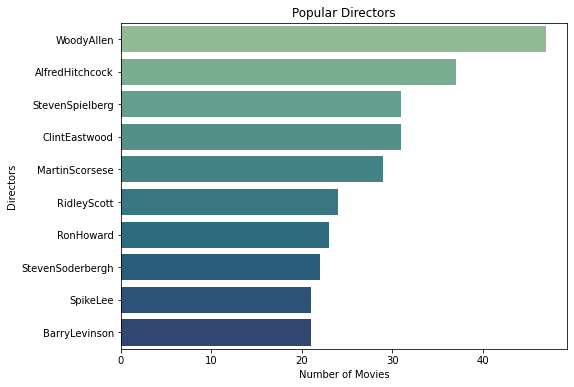

In [137]:
plt.figure(figsize=(8,6))
sns.barplot(y = df_meta.groupby('director').count()['tmdb_rating'].sort_values(ascending=False)[:11].drop(index='').index, 
           x = df_meta.groupby('director').count()['tmdb_rating'].sort_values(ascending=False)[:11].drop(index='').values, palette='crest')
plt.xlabel('Number of Movies')
plt.ylabel('Directors')
plt.title('Popular Directors');

In [138]:
df_meta.groupby('director').count()['tmdb_rating'].sort_values(ascending=False)[:11].drop(index='')

director
WoodyAllen          47
AlfredHitchcock     37
StevenSpielberg     31
ClintEastwood       31
MartinScorsese      29
RidleyScott         24
RonHoward           23
StevenSoderbergh    22
SpikeLee            21
BarryLevinson       21
Name: tmdb_rating, dtype: int64

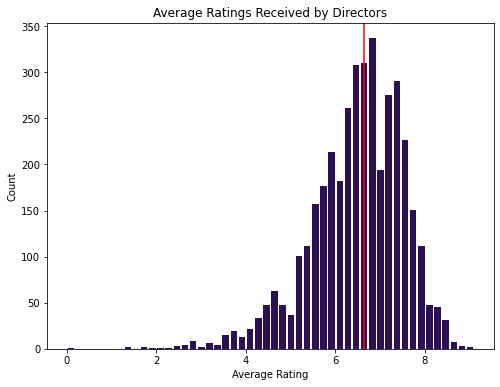

In [139]:
plt.figure(figsize=(8,6))
plt.hist(df_meta.groupby('director').mean()['imdb_rating'].sort_values(ascending=False), bins=50, rwidth=0.8, color='#2b1153', label='Average Rating of Directors')
plt.axvline(df_meta['imdb_rating'].mean(), color='r', label='Mean Rating')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Average Ratings Received by Directors');

In [140]:
df_meta['cast']

0                 TomHanks TimAllen DonRickles JimVarney 
1       RobinWilliams JonathanHyde KirstenDunst Bradle...
2       WalterMatthau JackLemmon Ann-Margret SophiaLoren 
3       WhitneyHouston AngelaBassett LorettaDevine Lel...
4       SteveMartin DianeKeaton MartinShort KimberlyWi...
                              ...                        
9546    MichelPiccoli Miou-Miou BéatriceRomand Frances...
9547                                     BrunhildePomsel 
9548       JulianRadlmaier DeraghCampbell BeniaminForthi 
9549                                    HelmutQualtinger 
9550             GreyGriffin TaraStrong AnaisFairweather 
Name: cast, Length: 9541, dtype: object

In [141]:
df_meta.to_csv('../data/content.csv', index=False)